<a href="https://colab.research.google.com/github/ApoorvaNagarajan/Image-Filter-Kernels/blob/master/assignment5/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import all the required python libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras import regularizers

from keras.datasets import mnist

In [0]:
# downloads the MNIST dataset and splits it into test and train.
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# X_train and X_test are reshaped from 3 dimensions to 4 dimensions
# 1st dim : num images
# 2nd and 3rd dim : Width and height of eaach of the images
# 4th dim : number of channels in each of the image. We set this to 1 as the
#           our dataset has only gray images
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


# Normalizing the pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [0]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [112]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01), input_shape=(28,28,1))) # receptive field: 3x3, output dim: 26x26x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(0.01))) # receptive field: 5x5, output dim: 24x24x32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # receptive field: 5x5, output dim: 24x24x10

model.add(MaxPooling2D(pool_size=(2, 2))) # receptive field: 10x10, output dim: 12x12x10

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) # receptive field: 12x12, output dim: 10x10x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) # receptive field: 14x14, output dim: 8x8x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) # receptive field: 16x16, output dim: 6x6x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) # receptive field: 18x18, output dim: 4x4x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<kera

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_23 (Activation)   (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [0]:
from keras.callbacks import ModelCheckpoint

# saves the model weights after each epoch if the validation loss decreased
checkpoint = ModelCheckpoint("assign5_model",verbose=1,save_best_only=True, monitor='val_acc', mode='max')

In [114]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Use data generator to get normalized images
# Use model checkpoint to save the best model
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128), steps_per_epoch=len(X_train)/128, epochs=40, verbose=1, validation_data=datagen.flow(X_test, Y_test), validation_steps=len(X_test)/128, callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpoint])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/468 [==============================] - 12s 26ms/step - loss: 0.8615 - acc: 0.8443 - val_loss: 1.4574 - val_acc: 0.5083

Epoch 00001: val_acc improved from -inf to 0.50831, saving model to assign5_model
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/468 [==============================] - 8s 16ms/step - loss: 0.3471 - acc: 0.9150 - val_loss: 0.2934 - val_acc: 0.9561

Epoch 00002: val_acc improved from 0.50831 to 0.95609, saving model to assign5_model
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/468 [==============================] - 8s 16ms/step - loss: 0.2853 - acc: 0.9305 - val_loss: 0.2096 - val_acc: 0.9600

Epoch 00003: val_acc improved from 0.95609 to 0.96005, saving model to assign5_model
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/468 [==============================] 

In [116]:
# Load the saved model
model.load_weights("assign5_model");

# Evaluate loss and accuracy for testing data with the saved model
scores = model.evaluate_generator(generator=datagen.flow(X_test, Y_test, batch_size=1, shuffle=False),steps=len(X_test))
print(scores)

[0.042516303583979606, 0.9939]


In [0]:
# Predict the labels for each of the image in the testing set
y_pred = model.predict_generator(generator=datagen_train.flow(X_test, Y_test, batch_size=1, shuffle=False),steps=len(X_test))

# convert categorical matrix back to class labels. argmax returns the index of the maximum value along an axis
y_pred_label = np.argmax(y_pred,axis=1)

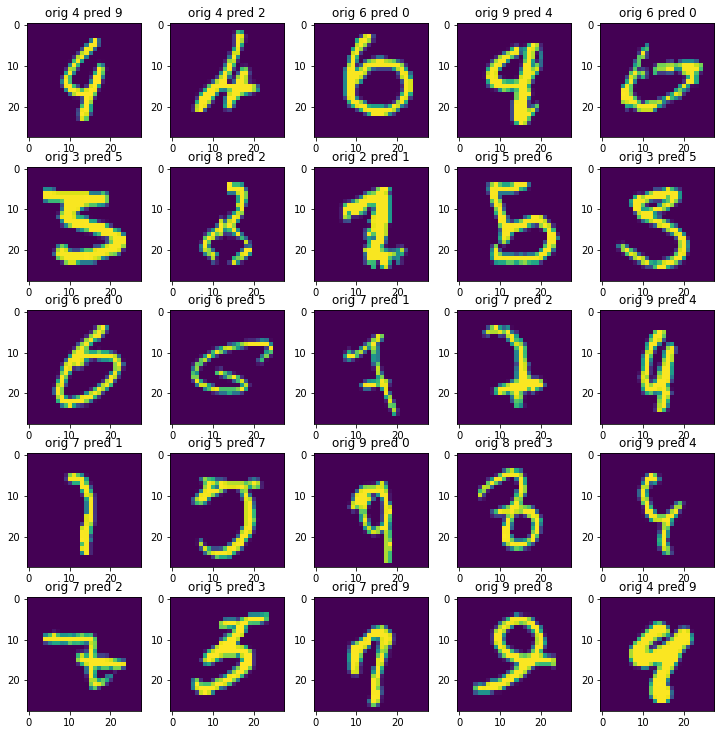

In [118]:
# plotting 25 misclassified images


from matplotlib import pyplot as plt

# Set up the display matix to display 25 images
fig, ax = plt.subplots(5, 5, figsize = (5, 5))
fig.tight_layout(pad = 0.3, rect = [0, 0, 2, 2])
counter = 0
X_test = X_test.reshape(X_test.shape[0], 28, 28)


# Compare labels of prediction and original to get the misclassified images
for indx in range(y_test.shape[0]):
  if y_pred_label[indx] != y_test[indx]:
    ax[counter//5][counter%5].imshow(X_test[indx])
    ax[counter//5][counter%5].set_title('orig %d pred %d' % (y_test[indx], y_pred_label[indx]))
    counter += 1
  if counter >= 25:
    break
      